## Modeling

__Clustering with the Iris Dataset__

* Choose features other than the ones used in the lesson.
* Visualize the results of your clustering.
* Use the elbow method to visually select a good value for k.
* Repeat the clustering, this time with 3 different features.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# supress scientific notation
np.set_printoptions(suppress=True)

#Have access to pydatasets
from pydataset import data

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#acquire the data
iris = data('iris')

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
#Rename columns
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


I'm not going to split into train, validate and test for this exercise, but I know its something we should do in our project

In [7]:
#Define the independent variables for the model
#Can't use sepal length or petal length
X = iris[['sepal_width', 'petal_width']]

In [8]:
#Create the model
kmeans = KMeans(n_clusters = 3, random_state = 123)

#Fit the model
kmeans.fit(X)

#Make predictions
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [9]:
iris['cluster'] = kmeans.predict(X)

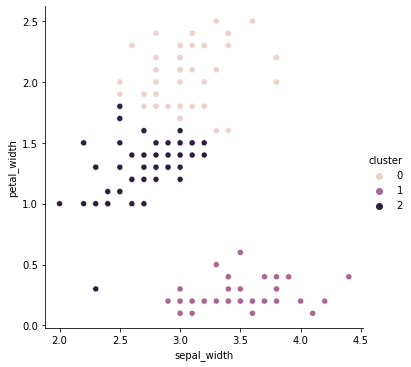

In [10]:
sns.relplot(x = 'sepal_width', y = 'petal_width', hue = 'cluster', data = iris)
plt.show()

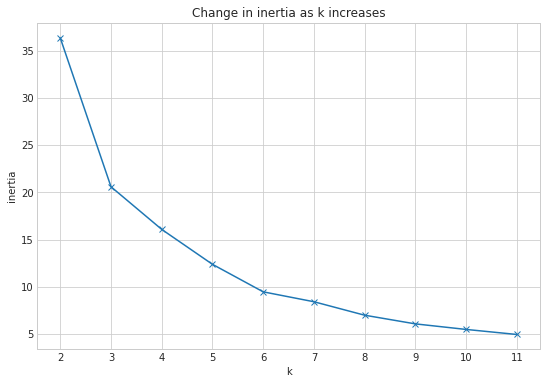

In [12]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [13]:
#Based on the above graph, it seems like a value of 3, 4, or 5 would be a good choice
#Now use 3 features instead of just 2
X = iris[['petal_length', 'petal_width', 'sepal_width']]

In [14]:
#Create the object
kmeans = KMeans(n_clusters = 3, random_state = 123)

#Fit the object
kmeans.fit(X)

#Make predictions
iris['cluster'] = kmeans.predict(X)

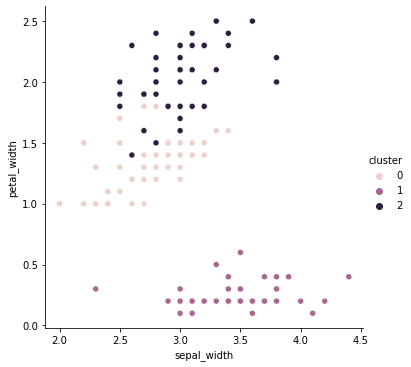

In [15]:
#Visualize clusters
sns.relplot(x = 'sepal_width', y = 'petal_width', hue = 'cluster', data = iris)
plt.show()

__Part 2__

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!